In [1]:
import numpy as np
import pandas as pd
import datatable as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb


from sklearn.metrics import (accuracy_score, confusion_matrix, balanced_accuracy_score, 
                roc_auc_score,  ConfusionMatrixDisplay)


pd.set_option('display.max_rows', 50)

In [4]:
data = pd.read_csv('.\data\Social_Network_Ads.csv')

In [5]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
data.shape

(400, 3)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


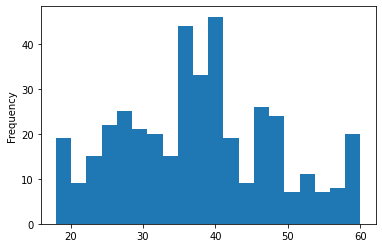

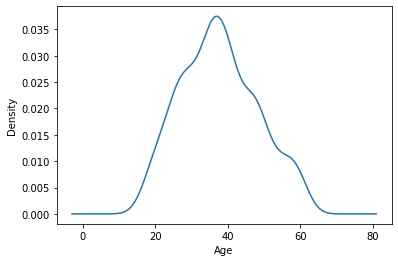

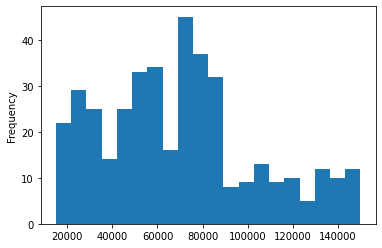

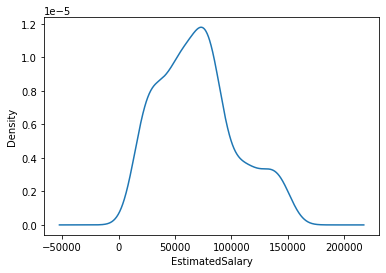

In [19]:
for col in ['Age','EstimatedSalary']:
    #print(col)
    data[col].plot(kind = 'hist', bins = 20)
    plt.show()
    data[col].plot(kind = 'kde')
    plt.xlabel(col)
    plt.show()
    

In [21]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
                data.drop('Purchased', axis = 1),
                data['Purchased'],
                test_size=0.3,
                random_state=0)

In [24]:
scale = StandardScaler()
scale.fit(X_train)

StandardScaler()

In [25]:
X_train_sc = scale.transform(X_train)
X_test_sc = scale.transform(X_test)

In [26]:
classifier = GaussianNB()
classifier.fit(X_train_sc,y_train)

GaussianNB()

In [27]:
y_pred = classifier.predict(X_test_sc)

In [29]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[74,  5],
       [ 8, 33]], dtype=int64)

In [30]:
accuracy_score(y_test, y_pred)

0.8916666666666667

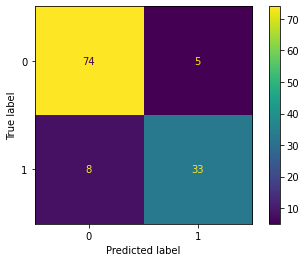

In [35]:
disp = ConfusionMatrixDisplay(cm,display_labels=classifier.classes_)
disp.plot()

In [36]:
classifier.classes_

array([0, 1], dtype=int64)